In [360]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
# PyTorch related imports would go here
import numpy as np

In [361]:
from sklearn.feature_extraction.text import TfidfVectorizer
from us import states
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import re

In [362]:
state_names = [state.name.lower() for state in states.STATES]
state_abbrs = [state.abbr for state in states.STATES]
city_df = pd.read_csv('PM25-Speciated/worldcities.csv')
city_names = city_df['city_ascii'].str.lower().tolist()  # First column
country_names = city_df['country'].str.lower().tolist()  # First column

In [363]:
stop_words = TfidfVectorizer(stop_words='english').get_stop_words()
stop_words = list(list(stop_words)+ city_names + country_names + state_names + state_abbrs)

# Original Data

In [364]:
#DATASET_NAME = "SpeciateV5.3_PM_AE6.csv"
DATASET_NAME = "SpeciateV5.3_PM_All.csv"

df = pd.read_csv('PM25-Speciated/specviate_v5_3datasets/'+DATASET_NAME, encoding='ISO-8859-1')

In [365]:
df

,Unnamed: 0,PROFILE_CODE,WEIGHT_PERCENT,UNCERTAINTY_PERCENT,SPECIES_NAME,SYMBOL,PROFILE_NAME,PROFILE_TYPE,TOTAL,REGION,CATEGORY_LEVEL_1_Generation_Mechanism,CATEGORY_LEVEL_2_Sector_Equipment,CATEGORY_LEVEL_3_.Fuel_Product
0,291,0000010,0.1140,0.089000,Tin,Sn,Overall Composite,PM,55.476002,NaN,Miscellaneous,Miscellaneous,Miscellaneous
1,292,0000010,2.6320,1.464000,Sulfur,S,Overall Composite,PM,55.476002,NaN,Miscellaneous,Miscellaneous,Miscellaneous
2,293,0000010,5.0460,3.574000,Sulfate,SO4=,Overall Composite,PM,55.476002,NaN,Miscellaneous,Miscellaneous,Miscellaneous
3,295,0000010,1.3770,1.535000,Sodium,Na,Overall Composite,PM,55.476002,NaN,Miscellaneous,Miscellaneous,Miscellaneous
4,297,0000010,0.0250,0.418000,Selenium,Se,Overall Composite,PM,55.476002,NaN,Miscellaneous,Miscellaneous,Miscellaneous
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76500,331373,95780,0.0000,0.123300,Nitrate,NO3-,Paved Road Dust,PM,55.612400,"Lake Tahoe, Nevada",Dust,Road,Paved
76501,331375,95780,0.0000,0.009700,Mercury,Hg,Paved Road Dust,PM,55.612400,"Lake Tahoe, Nevada",Dust,Road,Paved
76502,331376,95780,0.0269,0.012666,Lead,Pb,Paved Road Dust,PM,55.612400,"Lake Tahoe, Nevada",Dust,Road,Paved
76503,331377,95780,0.1509,0.419457,Magnesium,Mg,Paved Road Dust,PM,55.612400,"Lake Tahoe, Nevada",Dust,Road,Paved


In [366]:
df = df.pivot_table(index=['PROFILE_CODE', 'PROFILE_NAME'], columns='SPECIES_NAME', values='WEIGHT_PERCENT', aggfunc='first').reset_index()
# Fill NaN values with 0 (or any other value you prefer)
df = df.fillna(0)

In [367]:
df

SPECIES_NAME,PROFILE_CODE,PROFILE_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Silica,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,0000010,Overall Composite,3.81900,0.023000,0.8090,1.410000,0.0,0.385000,2.399000,0.0,...,0.0,7.736000,1.377000,0.0000,5.046000,2.632000,0.114000,0.058000,2.218000,0.002000
1,000002.5,Overall Composite,4.44300,0.022000,0.7650,1.476000,0.0,0.421000,2.614000,0.0,...,0.0,9.491000,1.652000,0.0000,5.514000,2.972000,0.117000,0.061000,2.233000,0.002000
2,0000030,Overall Composite,4.02400,0.022000,0.8280,1.175000,0.0,0.377000,2.945000,0.0,...,0.0,8.673000,1.407000,0.0000,6.169000,2.876000,0.162000,0.062000,2.392000,0.003000
3,00000C,Overall Composite,4.07900,0.030000,0.8060,1.118000,0.0,0.285000,2.804000,0.0,...,0.0,8.933000,1.577000,0.0000,5.030000,2.457000,0.103000,0.059000,2.235000,0.004000
4,1120110,Coal-Fired Power Plant,14.84300,0.000000,0.0000,0.055000,0.0,0.005000,1.393000,0.0,...,0.0,23.290000,0.000000,0.0000,0.000000,1.803000,0.006000,0.072000,0.055000,0.053000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,95776,Residential Wood Combustion - Composite of fir...,0.01617,0.154896,0.0013,0.000492,0.0,0.002611,0.094026,0.0,...,0.0,0.061561,0.023333,0.0457,0.217874,0.101063,0.000713,0.000236,0.038925,0.000695
3390,95777,Paved Road Dust,10.31170,0.098100,0.0000,0.000000,0.0,0.000000,3.964900,0.0,...,0.0,30.365200,0.140500,0.1365,0.809900,0.591800,0.000000,0.006200,0.095100,0.034500
3391,95778,Paved Road Dust,5.01290,0.168000,0.0094,0.000000,0.0,0.000000,2.393000,0.0,...,0.0,15.603500,0.339700,0.1454,0.463600,0.646400,0.007000,0.000000,0.088800,0.033300
3392,95779,Paved Road Dust,8.89020,0.068400,0.0000,0.000200,0.0,0.000000,3.314800,0.0,...,0.0,29.196600,0.153500,0.0943,0.200500,0.369700,0.001100,0.008900,0.067600,0.019000


In [368]:
def clean_text(text):
    # Remove numbers and special characters
    text = re.sub(r'[^A-Za-z\s]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [369]:
# df['name'] = df['name'].apply(clean_text)

In [370]:
df

SPECIES_NAME,PROFILE_CODE,PROFILE_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Silica,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,0000010,Overall Composite,3.81900,0.023000,0.8090,1.410000,0.0,0.385000,2.399000,0.0,...,0.0,7.736000,1.377000,0.0000,5.046000,2.632000,0.114000,0.058000,2.218000,0.002000
1,000002.5,Overall Composite,4.44300,0.022000,0.7650,1.476000,0.0,0.421000,2.614000,0.0,...,0.0,9.491000,1.652000,0.0000,5.514000,2.972000,0.117000,0.061000,2.233000,0.002000
2,0000030,Overall Composite,4.02400,0.022000,0.8280,1.175000,0.0,0.377000,2.945000,0.0,...,0.0,8.673000,1.407000,0.0000,6.169000,2.876000,0.162000,0.062000,2.392000,0.003000
3,00000C,Overall Composite,4.07900,0.030000,0.8060,1.118000,0.0,0.285000,2.804000,0.0,...,0.0,8.933000,1.577000,0.0000,5.030000,2.457000,0.103000,0.059000,2.235000,0.004000
4,1120110,Coal-Fired Power Plant,14.84300,0.000000,0.0000,0.055000,0.0,0.005000,1.393000,0.0,...,0.0,23.290000,0.000000,0.0000,0.000000,1.803000,0.006000,0.072000,0.055000,0.053000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,95776,Residential Wood Combustion - Composite of fir...,0.01617,0.154896,0.0013,0.000492,0.0,0.002611,0.094026,0.0,...,0.0,0.061561,0.023333,0.0457,0.217874,0.101063,0.000713,0.000236,0.038925,0.000695
3390,95777,Paved Road Dust,10.31170,0.098100,0.0000,0.000000,0.0,0.000000,3.964900,0.0,...,0.0,30.365200,0.140500,0.1365,0.809900,0.591800,0.000000,0.006200,0.095100,0.034500
3391,95778,Paved Road Dust,5.01290,0.168000,0.0094,0.000000,0.0,0.000000,2.393000,0.0,...,0.0,15.603500,0.339700,0.1454,0.463600,0.646400,0.007000,0.000000,0.088800,0.033300
3392,95779,Paved Road Dust,8.89020,0.068400,0.0000,0.000200,0.0,0.000000,3.314800,0.0,...,0.0,29.196600,0.153500,0.0943,0.200500,0.369700,0.001100,0.008900,0.067600,0.019000


In [371]:
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# text_cols = df.select_dtypes(include=[object]).columns

# print(text_cols)

# agg_funcs = {col: 'mean' for col in numeric_cols}
# agg_funcs.update({col: lambda x: np.random.choice(x) for col in text_cols if col != 'name'})

# pivot_df = df.groupby('name').agg(agg_funcs).reset_index()

In [372]:
# cols = list(pivot_df.columns)
# cols.insert(0, cols.pop(cols.index('code')))
# pivot_df = pivot_df[cols]
# pivot_df

In [373]:
pivot_df = df
pivot_df

SPECIES_NAME,PROFILE_CODE,PROFILE_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Silica,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,0000010,Overall Composite,3.81900,0.023000,0.8090,1.410000,0.0,0.385000,2.399000,0.0,...,0.0,7.736000,1.377000,0.0000,5.046000,2.632000,0.114000,0.058000,2.218000,0.002000
1,000002.5,Overall Composite,4.44300,0.022000,0.7650,1.476000,0.0,0.421000,2.614000,0.0,...,0.0,9.491000,1.652000,0.0000,5.514000,2.972000,0.117000,0.061000,2.233000,0.002000
2,0000030,Overall Composite,4.02400,0.022000,0.8280,1.175000,0.0,0.377000,2.945000,0.0,...,0.0,8.673000,1.407000,0.0000,6.169000,2.876000,0.162000,0.062000,2.392000,0.003000
3,00000C,Overall Composite,4.07900,0.030000,0.8060,1.118000,0.0,0.285000,2.804000,0.0,...,0.0,8.933000,1.577000,0.0000,5.030000,2.457000,0.103000,0.059000,2.235000,0.004000
4,1120110,Coal-Fired Power Plant,14.84300,0.000000,0.0000,0.055000,0.0,0.005000,1.393000,0.0,...,0.0,23.290000,0.000000,0.0000,0.000000,1.803000,0.006000,0.072000,0.055000,0.053000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,95776,Residential Wood Combustion - Composite of fir...,0.01617,0.154896,0.0013,0.000492,0.0,0.002611,0.094026,0.0,...,0.0,0.061561,0.023333,0.0457,0.217874,0.101063,0.000713,0.000236,0.038925,0.000695
3390,95777,Paved Road Dust,10.31170,0.098100,0.0000,0.000000,0.0,0.000000,3.964900,0.0,...,0.0,30.365200,0.140500,0.1365,0.809900,0.591800,0.000000,0.006200,0.095100,0.034500
3391,95778,Paved Road Dust,5.01290,0.168000,0.0094,0.000000,0.0,0.000000,2.393000,0.0,...,0.0,15.603500,0.339700,0.1454,0.463600,0.646400,0.007000,0.000000,0.088800,0.033300
3392,95779,Paved Road Dust,8.89020,0.068400,0.0000,0.000200,0.0,0.000000,3.314800,0.0,...,0.0,29.196600,0.153500,0.0943,0.200500,0.369700,0.001100,0.008900,0.067600,0.019000


In [374]:
pivot_df.iloc[:,2:47].head()

SPECIES_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,Chloride ion,Chlorine,...,Silica,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,3.819,0.023,0.809,1.410,0.0,0.385,2.399,0.0,0.0,0.0,...,0.0,7.736,1.377,0.0,5.046,2.632,0.114,0.058,2.218,0.002
1,4.443,0.022,0.765,1.476,0.0,0.421,2.614,0.0,0.0,0.0,...,0.0,9.491,1.652,0.0,5.514,2.972,0.117,0.061,2.233,0.002
2,4.024,0.022,0.828,1.175,0.0,0.377,2.945,0.0,0.0,0.0,...,0.0,8.673,1.407,0.0,6.169,2.876,0.162,0.062,2.392,0.003
3,4.079,0.030,0.806,1.118,0.0,0.285,2.804,0.0,0.0,0.0,...,0.0,8.933,1.577,0.0,5.030,2.457,0.103,0.059,2.235,0.004
4,14.843,0.000,0.000,0.055,0.0,0.005,1.393,0.0,0.0,0.0,...,0.0,23.290,0.000,0.0,0.000,1.803,0.006,0.072,0.055,0.053


# Clustering based on numeric values

In [375]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter

In [376]:
def assign_cluster_name(cluster):
    names = pivot_df[pivot_df['speciated_cluster'] == cluster]['PROFILE_NAME']
    most_common_name = Counter(names).most_common(1)[0][0]
    return most_common_name

In [377]:
X = pivot_df.iloc[:, 2:45]
#scaler = StandardScaler()
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [378]:
X

SPECIES_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,Chloride ion,Chlorine,...,Pyrolyzed organic carbon,Selenium,Silica,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium
0,3.81900,0.023000,0.8090,1.410000,0.0,0.385000,2.399000,0.0,0.000000,0.0,...,0.000000,0.025000,0.0,7.736000,1.377000,0.0000,5.046000,2.632000,0.114000,0.058000
1,4.44300,0.022000,0.7650,1.476000,0.0,0.421000,2.614000,0.0,0.000000,0.0,...,0.000000,0.025000,0.0,9.491000,1.652000,0.0000,5.514000,2.972000,0.117000,0.061000
2,4.02400,0.022000,0.8280,1.175000,0.0,0.377000,2.945000,0.0,0.000000,0.0,...,0.000000,0.029000,0.0,8.673000,1.407000,0.0000,6.169000,2.876000,0.162000,0.062000
3,4.07900,0.030000,0.8060,1.118000,0.0,0.285000,2.804000,0.0,0.000000,0.0,...,0.000000,0.023000,0.0,8.933000,1.577000,0.0000,5.030000,2.457000,0.103000,0.059000
4,14.84300,0.000000,0.0000,0.055000,0.0,0.005000,1.393000,0.0,0.000000,0.0,...,0.000000,0.018000,0.0,23.290000,0.000000,0.0000,0.000000,1.803000,0.006000,0.072000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,0.01617,0.154896,0.0013,0.000492,0.0,0.002611,0.094026,0.0,0.120587,0.0,...,1.983234,0.000199,0.0,0.061561,0.023333,0.0457,0.217874,0.101063,0.000713,0.000236
3390,10.31170,0.098100,0.0000,0.000000,0.0,0.000000,3.964900,0.0,0.106100,0.0,...,3.957000,0.000000,0.0,30.365200,0.140500,0.1365,0.809900,0.591800,0.000000,0.006200
3391,5.01290,0.168000,0.0094,0.000000,0.0,0.000000,2.393000,0.0,0.144400,0.0,...,2.190400,0.000000,0.0,15.603500,0.339700,0.1454,0.463600,0.646400,0.007000,0.000000
3392,8.89020,0.068400,0.0000,0.000200,0.0,0.000000,3.314800,0.0,0.066100,0.0,...,3.889100,0.000100,0.0,29.196600,0.153500,0.0943,0.200500,0.369700,0.001100,0.008900


In [379]:
model = NMF(n_components=32, init='random', random_state=0, max_iter=1000)
W = model.fit_transform(X)
H = model.components_

# What features to use for clustering

In [380]:
# Assuming 'target' is the category column, and 'name' is the label
X = pivot_df.iloc[:, 2:45]
#X = W

# Hierarchical Clustering

## k-NN Graph Construction

In [381]:
from sklearn.neighbors import NearestNeighbors
import networkx as nx
from scipy.sparse.linalg import svds

In [382]:
# Apply SVD to X
U, S, VT = svds(X.values, k=16)
X_svd = U @ np.diag(S) @ VT

In [383]:
X = X_svd

In [384]:
# Compute KNN

K = 3
knn = NearestNeighbors(n_neighbors=K)  # You can change the number of neighbors
knn.fit(X)
distances, indices = knn.kneighbors(X)

# Create a graph
G = nx.Graph()

# Add nodes with PROFILE_NAME as labels
for i, profile_name in enumerate(df['PROFILE_NAME']):
    G.add_node(i, label=profile_name)

# Add edges based on KNN
for i, neighbors in enumerate(indices):
    for neighbor in neighbors:
        if i != neighbor:  # Avoid self-loops
            G.add_edge(i, neighbor)

In [385]:
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend

In [386]:
# pos = nx.spring_layout(G)  # Layout for visualization
# labels = nx.get_node_attributes(G, 'label')

# plt.figure(figsize=(50, 50))
# nx.draw(G, pos, with_labels=True, labels=labels, node_size=100, node_color='skyblue', font_size=10, font_color='black', edge_color='gray')
# plt.title('K-Nearest Neighbor Graph')
# plt.show()

# Community Dectection

In [387]:
import cdlib
from cdlib import algorithms
import networkx as nx
# G = nx.karate_club_graph()

# non-overlap louvain
coms = algorithms.louvain(G, weight='weight', resolution=1., randomize=False)

In [388]:
print(coms.method_name)
print(coms.communities)
print(coms.node_coverage)
print(coms.overlap )
print(coms.method_parameters)
#print(coms.to_json)
print(coms.average_internal_degree())
print(coms.average_internal_degree(summary=False))

Louvain
[[1236, 1548, 1549, 1550, 1551, 1554, 1555, 1560, 1561, 1562, 1564, 1572, 1574, 1575, 1576, 1588, 1590, 1591, 1625, 1626, 2373, 2374, 2378, 2385, 2387, 2389, 2390, 2391, 2392, 2395, 2396, 2397, 2398, 2399, 2400, 2401, 2402, 2403, 2404, 2405, 2406, 2409, 2516, 2517, 2522, 2523, 2524, 2527, 2536, 2537, 2538, 2539, 2540, 2560, 2567, 2572, 2585, 2586, 2587, 2588, 2666, 2671, 2674, 2677, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2699, 2700, 2701, 2711, 2712, 2715, 2716, 2717, 2718, 2721, 2728, 2729, 2732, 2736, 2737, 2739, 2740, 2745, 2746, 2747, 2759, 2760, 2763, 2764, 2765, 2766, 2777, 2778, 2794, 2800, 2804, 2806, 2807, 2812, 2813, 2819, 3112, 3113, 3115, 3117, 3118, 3119, 3120, 3124, 3125, 3129, 3133, 3134, 3135, 3136, 3140, 3141, 3142, 3144, 3145, 3146, 3147, 3148, 3151, 3154, 3157, 3158, 3159, 3160, 3161, 3315, 3316, 3317, 3318], [144, 146, 147, 180, 182, 183, 184, 186, 187, 228, 230, 231, 369, 371, 375, 379, 468, 470, 471, 472, 474, 475, 484, 486, 487, 488, 490, 491, 49

In [389]:
com_map={}

for i in range(len(coms.communities)):
    community = coms.communities[i]
    for j in community:
        com_map[j] = i
        
com_map

{1236: 0,
 1548: 0,
 1549: 0,
 1550: 0,
 1551: 0,
 1554: 0,
 1555: 0,
 1560: 0,
 1561: 0,
 1562: 0,
 1564: 0,
 1572: 0,
 1574: 0,
 1575: 0,
 1576: 0,
 1588: 0,
 1590: 0,
 1591: 0,
 1625: 0,
 1626: 0,
 2373: 0,
 2374: 0,
 2378: 0,
 2385: 0,
 2387: 0,
 2389: 0,
 2390: 0,
 2391: 0,
 2392: 0,
 2395: 0,
 2396: 0,
 2397: 0,
 2398: 0,
 2399: 0,
 2400: 0,
 2401: 0,
 2402: 0,
 2403: 0,
 2404: 0,
 2405: 0,
 2406: 0,
 2409: 0,
 2516: 0,
 2517: 0,
 2522: 0,
 2523: 0,
 2524: 0,
 2527: 0,
 2536: 0,
 2537: 0,
 2538: 0,
 2539: 0,
 2540: 0,
 2560: 0,
 2567: 0,
 2572: 0,
 2585: 0,
 2586: 0,
 2587: 0,
 2588: 0,
 2666: 0,
 2671: 0,
 2674: 0,
 2677: 0,
 2687: 0,
 2688: 0,
 2689: 0,
 2690: 0,
 2691: 0,
 2692: 0,
 2693: 0,
 2694: 0,
 2699: 0,
 2700: 0,
 2701: 0,
 2711: 0,
 2712: 0,
 2715: 0,
 2716: 0,
 2717: 0,
 2718: 0,
 2721: 0,
 2728: 0,
 2729: 0,
 2732: 0,
 2736: 0,
 2737: 0,
 2739: 0,
 2740: 0,
 2745: 0,
 2746: 0,
 2747: 0,
 2759: 0,
 2760: 0,
 2763: 0,
 2764: 0,
 2765: 0,
 2766: 0,
 2777: 0,
 2778: 0,


In [390]:
coms_l = [algorithms.louvain(G), algorithms.label_propagation(G), algorithms.walktrap(G)]
overlap_coms = algorithms.endntm(G, coms_l)

In [391]:
print(overlap_coms.communities)

[[2560, 2567, 1548, 1549, 1550, 1551, 2572, 1554, 1555, 1560, 1561, 1562, 2585, 1564, 2586, 2587, 2588, 1572, 1574, 1575, 1576, 3112, 3113, 3115, 3117, 3118, 3119, 3120, 3122, 1588, 3124, 1590, 1591, 3125, 3129, 3133, 3134, 3135, 3136, 3140, 3141, 3142, 3144, 3145, 3146, 3148, 3151, 3154, 3157, 3158, 3159, 3160, 1625, 1626, 3161, 2666, 2671, 2674, 2677, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2699, 2700, 2701, 2711, 2712, 2715, 2716, 2717, 2718, 2721, 2728, 2729, 2732, 2736, 2737, 2739, 2740, 2745, 2746, 2747, 2748, 2759, 2760, 2763, 2764, 2765, 2766, 1236, 2777, 2778, 2794, 2800, 3315, 2804, 3316, 2806, 2807, 3317, 3318, 2813, 2819, 2373, 2374, 2378, 2385, 2387, 2389, 2390, 2391, 2392, 2395, 2396, 2397, 2398, 2399, 2400, 2401, 2402, 2403, 2404, 2405, 2406, 2409, 2516, 2517, 2522, 2523, 2524, 2527, 2536, 2537, 2538, 2539, 2540], [3075, 3076, 2334, 2338, 2342, 2351, 2874, 1085, 1086, 1087, 1088, 2372, 2889, 1105, 1107, 1108, 1109, 3324, 1111, 1112, 857, 858, 860, 861, 3326, 2152

In [392]:
overlap_com_map={}

for i in range(len(overlap_coms.communities)):
    community = overlap_coms.communities[i]
    for j in community:
        if j in overlap_com_map:
            overlap_com_map[j].append(i)
        else:
            overlap_com_map[j] = [i]
            
overlap_com_map

{2560: [0],
 2567: [0],
 1548: [0],
 1549: [0],
 1550: [0],
 1551: [0],
 2572: [0],
 1554: [0],
 1555: [0],
 1560: [0],
 1561: [0],
 1562: [0],
 2585: [0],
 1564: [0],
 2586: [0],
 2587: [0],
 2588: [0],
 1572: [0],
 1574: [0],
 1575: [0],
 1576: [0],
 3112: [0],
 3113: [0],
 3115: [0],
 3117: [0],
 3118: [0],
 3119: [0],
 3120: [0],
 3122: [0, 9],
 1588: [0],
 3124: [0],
 1590: [0],
 1591: [0],
 3125: [0],
 3129: [0],
 3133: [0],
 3134: [0],
 3135: [0],
 3136: [0],
 3140: [0],
 3141: [0],
 3142: [0],
 3144: [0],
 3145: [0],
 3146: [0],
 3148: [0],
 3151: [0],
 3154: [0],
 3157: [0],
 3158: [0],
 3159: [0],
 3160: [0],
 1625: [0],
 1626: [0],
 3161: [0],
 2666: [0],
 2671: [0],
 2674: [0],
 2677: [0],
 2687: [0],
 2688: [0],
 2689: [0],
 2690: [0],
 2691: [0],
 2692: [0],
 2693: [0],
 2694: [0],
 2699: [0],
 2700: [0],
 2701: [0],
 2711: [0],
 2712: [0],
 2715: [0],
 2716: [0],
 2717: [0],
 2718: [0],
 2721: [0],
 2728: [0],
 2729: [0],
 2732: [0],
 2736: [0],
 2737: [0],
 2739: [0],
 

In [393]:
for i in range(len(pivot_df)):
    if i not in overlap_com_map:
        print(i)

In [394]:
# nx.write_graphml(G, 'knn_graph.graphml')


labels=[]
# y = [i+'-'+j for i,j in zip(pivot_df['PROFILE_NAME'],pivot_df['PROFILE_CODE'])]
y = [i for i in pivot_df['PROFILE_CODE']]
labels = dict(zip(range(len(y)), y))

# print(labels)

overlap_com_map_str = {key: ",".join([str(i) for i in value]) for key, value in overlap_com_map.items()}

nx.set_node_attributes(G, labels, 'labels')
nx.set_node_attributes(G, com_map, 'non_overlap_community')
nx.set_node_attributes(G, overlap_com_map_str, 'overlap_community')

filename = DATASET_NAME+"KNN"+str(K)+'.gexf'
print("Writing gephi...."+filename)
nx.write_gexf(G, filename)
print("Done....")

Writing gephi....SpeciateV5.3_PM_All.csvKNN3.gexf
Done....


## Box Plot

In [395]:
import matplotlib.pyplot as plt

# This magic command ensures that plots are shown inline in Jupyter Notebook
%matplotlib inline

In [419]:
def find_row_number(pivot_df, input_value):
    if isinstance(input_value, int):
        # If the input is an integer, use it directly to access the row number
        return [input_value]
    else:
        # If the input is a string, search in PROFILE_NAME and PROFILE_CODE
        result = pivot_df[(pivot_df['PROFILE_NAME'].str.contains(input_value, case=False, na=False)) |
                          (pivot_df['PROFILE_CODE'].str.contains(input_value, case=False, na=False))]
        if not result.empty:
            return result.index.tolist()
        else:
            return None

# to find element either give profile code as "5674", profile name as "Residual Oil Combustion - Composite"
# or just integer row number from pivot_df

elems = find_row_number(pivot_df, "Biomass")
elems

[3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321]

In [420]:
elem = 3314
cluster = next((cluster for cluster in coms.communities if elem in cluster), None)
selected_rows = pivot_df.loc[cluster]

selected_rows

SPECIES_NAME,PROFILE_CODE,PROFILE_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Silica,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
1569,3878,Diesel Exhaust,0.040000,0.000000,0.001900,0.000300,0.000000,0.004900,0.059800,0.0,...,0.0,0.510100,0.140300,0.0,0.416700,0.296700,0.007500,0.001100,0.059300,0.000000
1570,3879,Diesel Exhaust,0.046700,0.000000,0.002100,0.000400,0.000000,0.005300,0.066200,0.0,...,0.0,0.552700,0.159200,0.0,0.462600,0.326200,0.008400,0.001300,0.065700,0.000000
1571,3880,Diesel Exhaust,0.035200,0.000000,0.001800,0.000300,0.000000,0.004500,0.054700,0.0,...,0.0,0.475400,0.126000,0.0,0.380500,0.273200,0.006900,0.001000,0.054200,0.000000
1604,3913,Diesel Exhaust,0.000000,0.000000,0.002600,0.000800,0.000000,0.007900,0.062100,0.0,...,0.0,0.000000,0.000000,0.0,0.462900,0.329000,0.019500,0.000900,0.058700,0.000000
1605,3914,Diesel Exhaust,0.000000,0.000000,0.001900,0.000300,0.000000,0.004400,0.058300,0.0,...,0.0,0.000000,0.000000,0.0,0.295000,0.252200,0.002500,0.000600,0.068200,0.000000
1621,3930,Residential Wood Burning,0.018000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004000,0.0,...,0.0,0.225300,0.067000,0.0,0.000000,0.202800,0.005300,0.000000,0.000000,0.000100
2661,4845,Diesel Exhaust,0.022688,0.104571,0.000000,0.000535,0.000535,0.000000,0.082539,0.0,...,0.0,0.591283,0.131937,0.0,0.355548,0.228229,0.000000,0.000298,0.094030,0.002650
2669,4853,Diesel Exhaust,0.088713,0.106349,0.019709,0.000000,0.000000,0.000000,0.114047,0.0,...,0.0,0.590114,0.000000,0.0,0.332318,0.224623,0.000000,0.000000,0.090141,0.000000
2680,4864,Diesel Exhaust,0.026047,0.055045,0.000000,0.000976,0.000540,0.000000,0.098567,0.0,...,0.0,0.596952,0.114453,0.0,0.000000,0.250977,0.000000,0.000000,0.093692,0.002541
2681,4865,Diesel Exhaust,0.001092,0.108939,0.008713,0.000000,0.000310,0.000568,0.113762,0.0,...,0.0,0.347461,0.019081,0.0,0.249536,0.211905,0.002410,0.000000,0.061491,0.000000


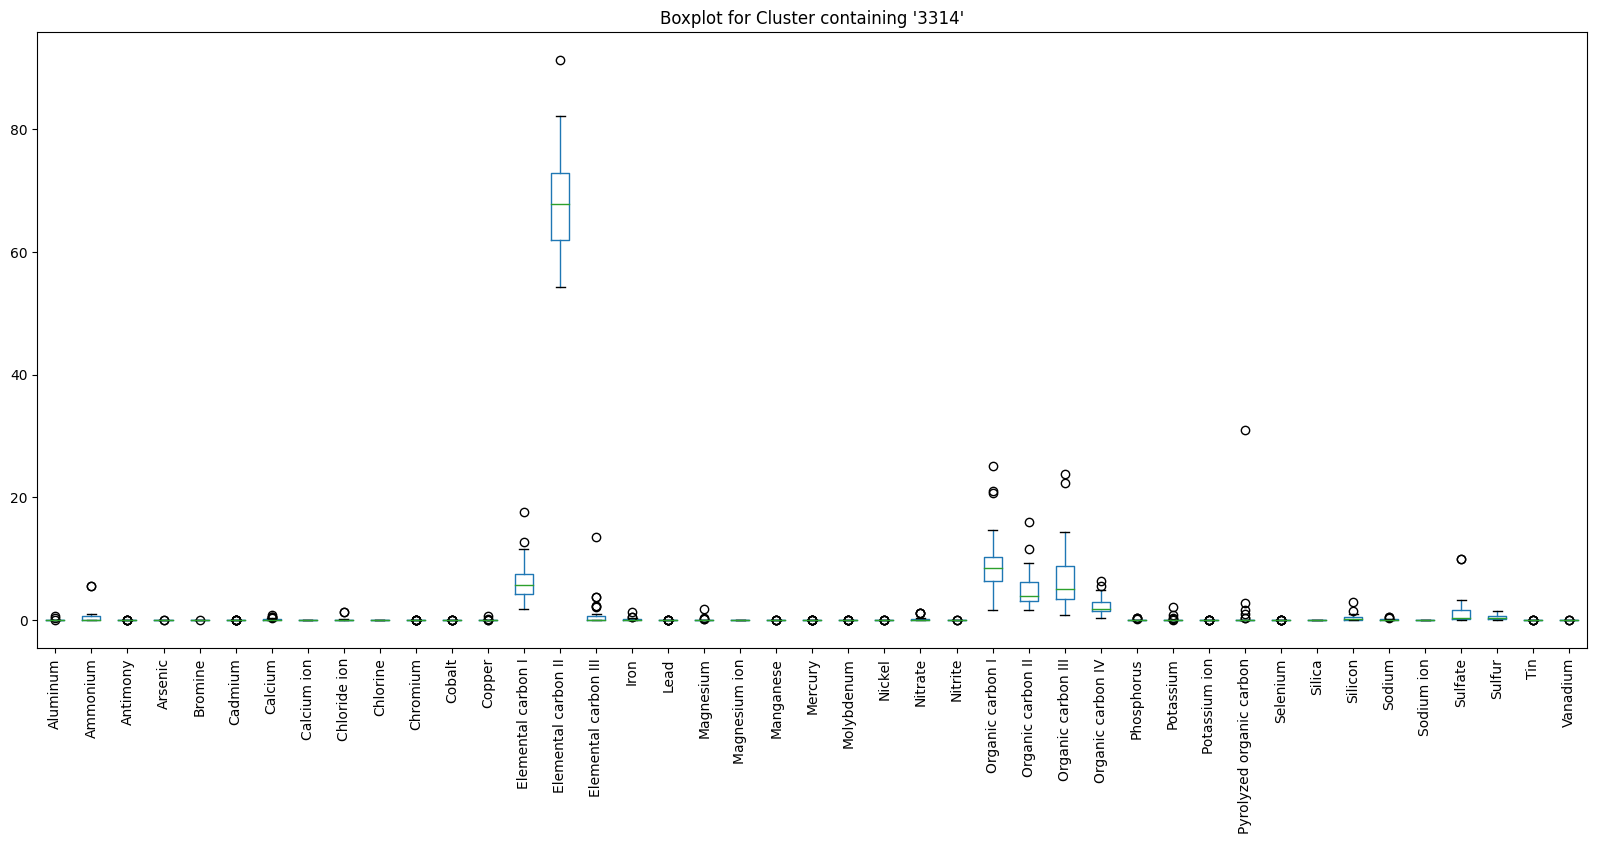

In [421]:
ax = selected_rows.iloc[:, 2:45].boxplot(figsize=(20, 8), grid=False)  # grid=False removes grid
ax.grid(False)

plt.title(f"Boxplot for Cluster containing '{elem}'")
plt.xticks(rotation=90)  # Rotate x-labels if needed
plt.show()

In [422]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD, NMF

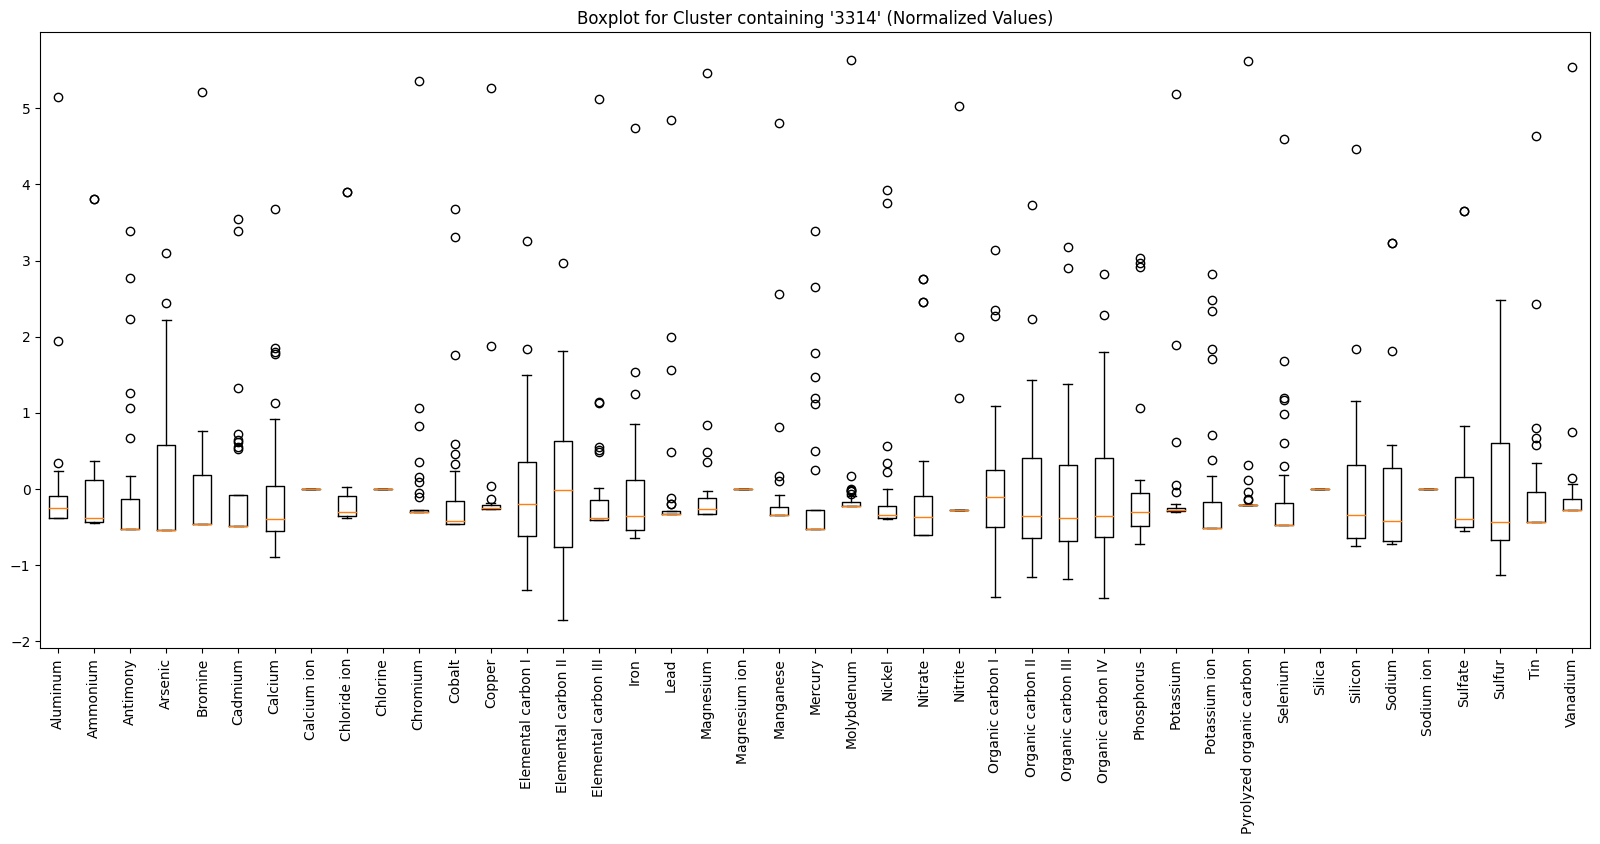

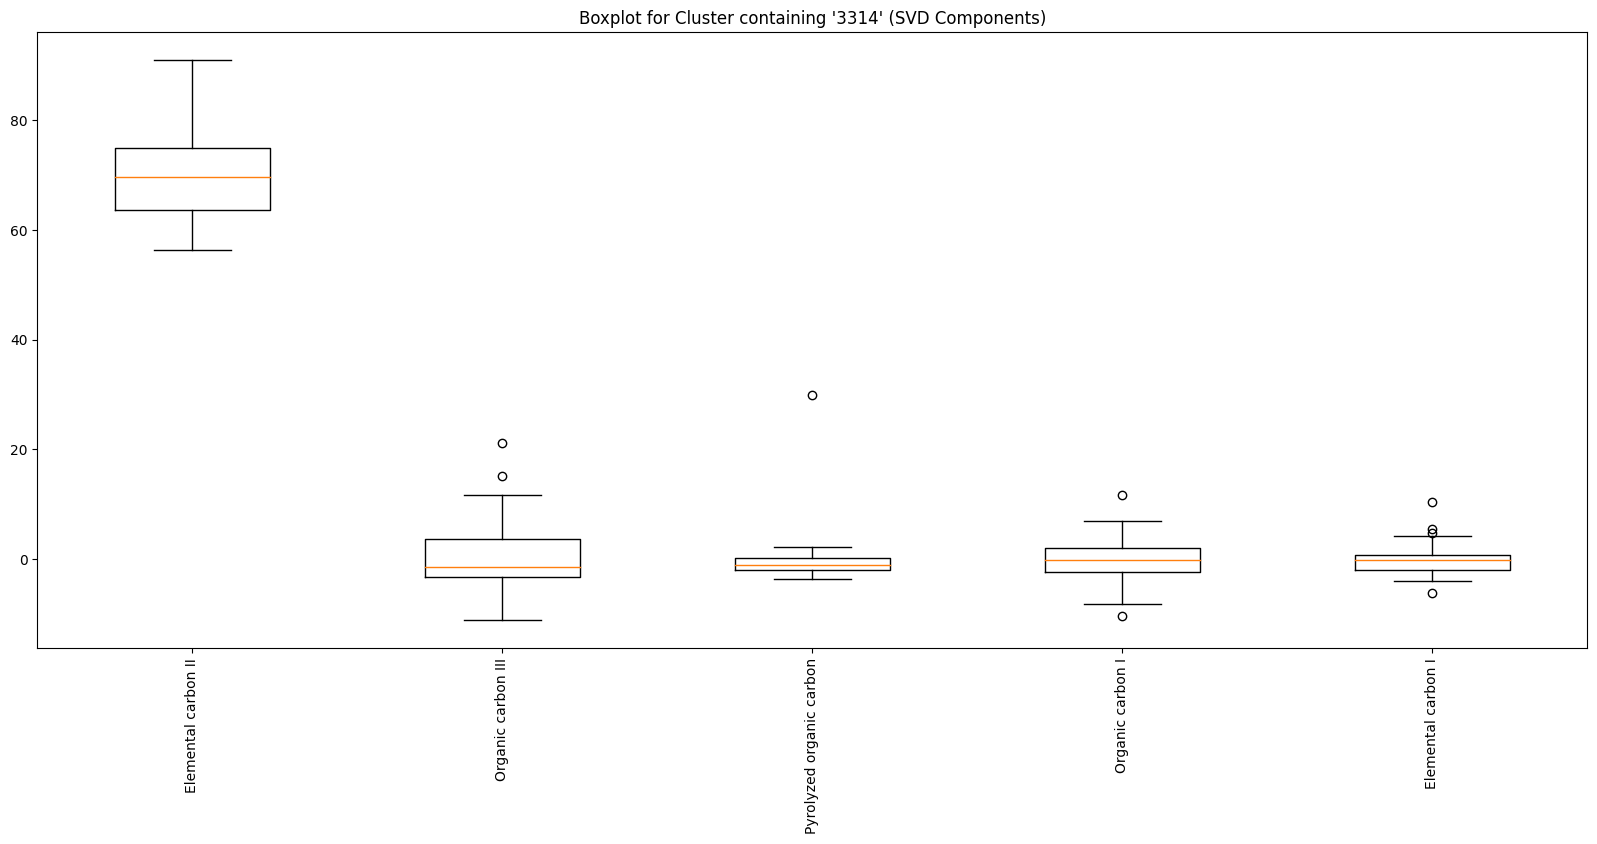

In [423]:
# Normalize the values
scaler = StandardScaler()
normalized_data = scaler.fit_transform(selected_rows.iloc[:, 2:45])

# Create the first box plot with normalized values
fig, ax = plt.subplots(figsize=(20, 8))
ax.boxplot(normalized_data)
ax.grid(False)
ax.set_xticklabels(selected_rows.columns[2:45], rotation=90)
plt.title(f"Boxplot for Cluster containing '{elem}' (Normalized Values)")
plt.xticks(rotation=90)
plt.show()

# Use SVD to find important components
svd = TruncatedSVD(n_components=5)
svd_data = svd.fit_transform(selected_rows.iloc[:, 2:45])

# Get the most important columns based on SVD components
important_columns_svd = selected_rows.columns[2:45][svd.components_.argmax(axis=1)]

# Create the second box plot with SVD components
fig, ax = plt.subplots(figsize=(20, 8))
ax.boxplot(svd_data)
ax.grid(False)
plt.title(f"Boxplot for Cluster containing '{elem}' (SVD Components)")
ax.set_xticklabels(important_columns_svd, rotation=90)
plt.show()

# # Use NMF to find important components
# nmf = NMF(n_components=5)
# nmf_data = nmf.fit_transform(selected_rows.iloc[:, 2:45])

# # Get the most important columns based on NMF components
# important_columns_nmf = selected_rows.columns[2:45][nmf.components_.argmax(axis=1)]

# # Create the third box plot with NMF components
# fig, ax = plt.subplots(figsize=(20, 8))
# ax.boxplot(nmf_data)
# ax.grid(False)
# plt.title(f"Boxplot for Cluster containing '{elem}' (NMF Components)")
# ax.set_xticklabels(important_columns_nmf, rotation=90)
# plt.show()


In [413]:
# # Initialize NMF and fit to the data
# model = NMF(n_components=2, init='random', random_state=0)
# W = model.fit_transform(X)
# H = model.components_

# # Visualize the data
# plt.scatter(W[:, 0], W[:, 1], c=y)
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.title('NMF Components')
# plt.colorbar()
# plt.show()